In [ ]:
!pip install Box2D gym

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 46.3 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
!pip install swig
!pip install moviepy
!pip install imageio
!pip install Box2D gym
!pip install ffmpeg --upgrade
!pip install pyvirtualdisplay
!pip install gymnasium[classic-control]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=ffb4bc4a93e9af54a896fd13ce84697bdbfe3a37f23c7dd0d85673e1c9333c56
  Stored in directory: /root/.cache/pip/wheels/26/21/0c/c26e09dff860a9071683e279445262346e008a9a1d2142c4ad
Successfully built ffmpeg
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 54.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
%matplotlib inline
import warnings
warnings.simplefilter(action = 'ignore')
import os
import gymnasium as gym
import random
import imageio
import subprocess
import numpy as np
from glob import glob
from IPython import display
import IPython.display as ipd
from matplotlib import pyplot as plt
from IPython.display import clear_output

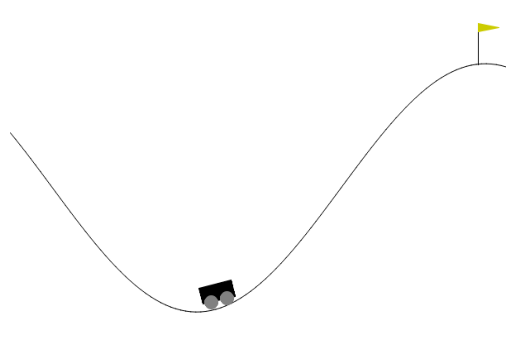

In [ ]:
def display(env: gym.Env) -> None:
    env.reset()
    img = plt.imshow(env.render())
    plt.axis('off')
    plt.show()

env = gym.make('MountainCar-v0', render_mode="rgb_array")
display(env)
env.close()

In [ ]:
env_name = 'MountainCar-v0'
env = gym.make(env_name)
# informations about the environment
print("Environment:", env_name)
print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)
# print("Reward Range:", env.reward_range)
print("Number of Actions:", env.action_space.n)
if hasattr(env, 'get_action_meanings'):
    print("Action Meanings:", env.get_action_meanings())
if hasattr(env, 'get_keys_to_action'):
    print("Keys to Action:", env.get_keys_to_action())
env.close()

Environment: MountainCar-v0
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Space: Discrete(3)
Number of Actions: 3


In [ ]:
dir(env)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_action_space',
 '_cached_spec',
 '_elapsed_steps',
 '_max_episode_steps',
 '_metadata',
 '_np_random',
 '_np_random_seed',
 '_observation_space',
 '_saved_kwargs',
 'action_space',
 'class_name',
 'close',
 'env',
 'get_wrapper_attr',
 'has_wrapper_attr',
 'metadata',
 'np_random',
 'np_random_seed',
 'observation_space',
 'render',
 'render_mode',
 'reset',
 'set_wrapper_attr',
 'spec',
 'step',
 'unwrapped',
 'wrapper_spec']

In [ ]:
print(env.observation_space.low) # minimum possible values for each variable in the state space
print(env.observation_space.high) # maximum possible values for each variable in the state space

[-1.2  -0.07]
[0.6  0.07]


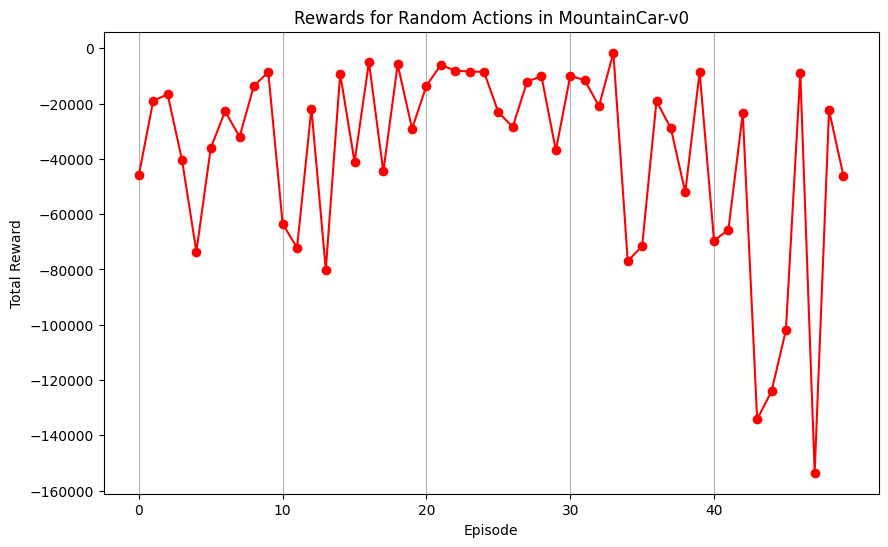

In [ ]:
warnings.simplefilter(action = 'ignore')
def run(env, num_episodes=50):
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = env.action_space.sample()  # take a random action
            state, reward, done, _ = env.step(action)[:4]
            total_reward += reward
            if done:
                break
        rewards.append(total_reward)
    return rewards
env = gym.make('MountainCar-v0')
episode_rewards = run(env, num_episodes=50) # run the random agent for 50 episodes
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, color='r', marker='o')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards for Random Actions in MountainCar-v0')
plt.xticks(np.arange(0, 49, 10))
plt.grid(axis='x')
plt.show()
env.close()

In [ ]:
env = gym.make('MountainCar-v0', render_mode="rgb_array")
state = env.reset()
output_directory = "/kaggle/working/framesrandom/"
os.makedirs(output_directory, exist_ok=True)
frames = [] # store frames
for i in range(100): # take 100 random actions
    # rendering the current frame using the environment's render method
    frame = env.render()
    frames.append(frame)
    action = env.action_space.sample() #take a random action
    state, reward, done, _ = env.step(action)[:4]
for i, frame in enumerate(frames):
    image_path = os.path.join(output_directory, f"frame_{i:03d}.png")
    imageio.imwrite(image_path, (frame * 255).astype(np.uint8))
# create a video from saved frames
os.system(f"ffmpeg -framerate 2 -i {output_directory}/frame_%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p videomelhes.mp4 2>NUL")

0

In [ ]:
plt.style.use('ggplot')
input_file = '/kaggle/input/agentrandom'
subprocess.run(['ffmpeg','-i',input_file,'-qscale',
                '0','videomelhes.mp4','-loglevel','quiet']
              )
!ls -GFlash --color
ipd.Video('videomelhes.mp4',embed=True, width=400)

total 120K
4.0K drwxr-xr-x 1 root 4.0K Nov 11 05:38 ./
4.0K drwxr-xr-x 1 root 4.0K Nov 11 05:26 ../
4.0K drwxr-xr-x 4 root 4.0K Nov  7 14:30 .config/
8.0K -rw-r--r-- 1 root 5.5K Nov 11 05:38 NUL
4.0K drwxr-xr-x 1 root 4.0K Nov  7 14:30 sample_data/
 96K -rw-r--r-- 1 root  93K Nov 11 05:38 videomelhes.mp4


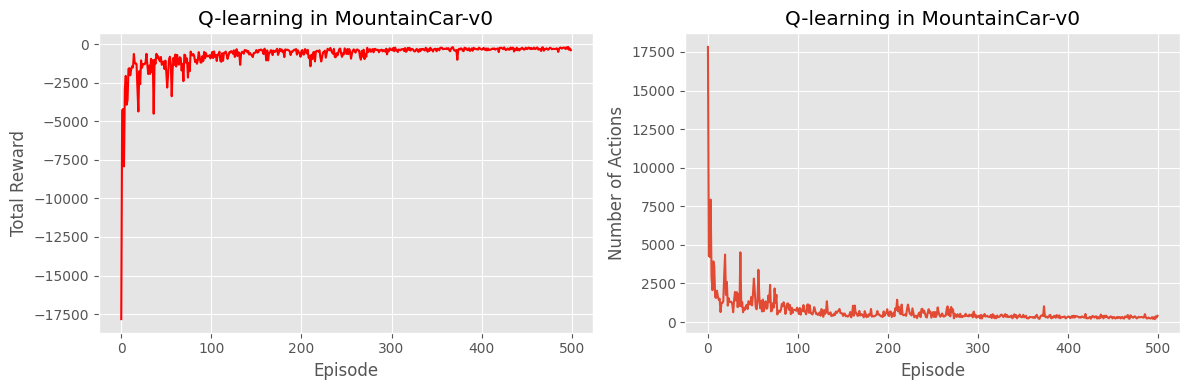

In [ ]:
def discretize_state(state, bins):
    """Discretize the continuous state into discrete bins."""
    if isinstance(state, tuple):
        state = state[0]
    discretized_state = tuple(np.digitize(s, bins[i]) - 1 for i, s in enumerate(state))
    return discretized_state
def q_learning(env, num_episodes=500, alpha=0.07, gamma=0.99, epsilon=0.3):
    num_bins = [20, 20] # discretize the state space
    state_bins = [np.linspace(-1.2, 0.6, num_bins[0]),
                  np.linspace(-0.07, 0.07, num_bins[1])]
    num_actions = env.action_space.n # initialize q-table
    Q = np.zeros((num_bins[0], num_bins[1], num_actions))
    rewards = [] # store rewards and number of actions taken
    num_actions_list = []
    for episode in range(num_episodes):
        state = discretize_state(env.reset(), state_bins)
        total_reward = 0
        num_actions_episode = 0

        while True:
            # epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # explore
            else:
                action = np.argmax(Q[state])  # exploit
            next_state, reward, done, _ = env.step(action)[:4]
            next_state = discretize_state(next_state, state_bins)
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action]) # q-value update ny the q-learning formula
            state = next_state
            total_reward += reward
            num_actions_episode += 1
            if done:
                break
        rewards.append(total_reward)
        num_actions_list.append(num_actions_episode)
    np.save('q_table.npy', Q)
    return rewards, num_actions_list

env = gym.make('MountainCar-v0', render_mode="rgb_array")
initial_state = env.reset()
rewards, num_actions_list = q_learning(env, num_episodes=500) # run q-learning

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rewards,color='r', label='Episode Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-learning in MountainCar-v0')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(num_actions_list, label='Number of Actions') # number of actions taken
plt.xlabel('Episode')
plt.ylabel('Number of Actions')
plt.title('Q-learning in MountainCar-v0')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Q_table = np.load('q_table.npy')
print(f"Q-table size: {Q_table.shape}")
print("Q-table after training:")
print(Q_table)

Q-table size: (20, 20, 3)
Q-table after training:
[[[  0.           0.           0.        ]
  [  0.           0.           0.        ]
  [-10.47267941 -11.32505378 -11.33394916]
  ...
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]]

 [[  0.           0.           0.        ]
  [ -0.07        -0.58993215  -0.79050638]
  [-19.16800876 -20.22951967 -19.92656823]
  ...
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]]

 [[  0.           0.           0.        ]
  [ -7.89844598  -7.5287145   -6.94323434]
  [-23.18702278 -22.94061374 -23.3548147 ]
  ...
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]]

 ...

 [[  0.           0.           0.        ]
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]
  ...
  [  0.    

In [ ]:
warnings.simplefilter(action = 'ignore')
def play_game_with_frames(env, Q_table, max_steps=1000):
    output_directory = "frames"
    os.makedirs(output_directory, exist_ok=True)
    state = env.reset()
    state = discretize_state(state, state_bins)
    print(f"Initial state: {state}")
    episode_frames = []
    total_reward = 0
    for step in range(max_steps):
        frame = env.render()
        if frame is not None:
            episode_frames.append(frame)
        action = np.argmax(Q_table[state])  # select action using q-table
        next_state, reward, done, _ = env.step(action)[:4]
        state = discretize_state(next_state, state_bins)
        total_reward += reward
        if done:
            break
    print(f"Total Reward: {total_reward}")
    for i, frame in enumerate(episode_frames): # save frames for this episode
        image_path = os.path.join(output_directory, f"frame_{i:03d}.png")
        imageio.imwrite(image_path, (frame * 255).astype(np.uint8))
    env.close()

state_bins = [np.linspace(-1.2, 0.6, 20), np.linspace(-0.07, 0.07, 20)] # assuming we have the state_bin from training

initial_state = env.reset()
print(f"Initial state before the loop: {initial_state}")
initial_state = discretize_state(initial_state, state_bins)

# playing the game with the trained q-table for 1 episode, save frames, and print total reward
play_game_with_frames(env, Q_table)
# useing ffmpeg to create a video from saved frames
video_filename = "cassietvid.mp4"
os.system(f"ffmpeg -framerate 30 -pattern_type glob -i 'frames/*.png' -c:v libx264 -pix_fmt yuv420p {video_filename}")

Initial state before the loop: (array([-0.5554413,  0.       ], dtype=float32), {})
Initial state: (np.int64(7), np.int64(9))
Total Reward: -152.0


0

In [ ]:
plt.style.use('ggplot')
input_file = '/kaggle/input/trainedagent1'
subprocess.run(['ffmpeg',
                '-i',
                input_file,
                '-qscale',
                '0',
                'cassietvid.mp4',
                '-loglevel',
                'quiet'])

CompletedProcess(args=['ffmpeg', '-i', '/kaggle/input/trainedagent1', '-qscale', '0', 'cassietvid.mp4', '-loglevel', 'quiet'], returncode=1)

In [ ]:
!ls -GFlash --color
ipd.Video('cassietvid.mp4',embed=True, width=500)

total 176K
4.0K drwxr-xr-x 1 root 4.0K Nov 11 05:41 ./
4.0K drwxr-xr-x 1 root 4.0K Nov 11 05:26 ../
 40K -rw-r--r-- 1 root  39K Nov 11 05:41 cassietvid.mp4
4.0K drwxr-xr-x 4 root 4.0K Nov  7 14:30 .config/
4.0K drwxr-xr-x 2 root 4.0K Nov 11 05:41 frames/
8.0K -rw-r--r-- 1 root 5.5K Nov 11 05:38 NUL
 12K -rw-r--r-- 1 root 9.5K Nov 11 05:41 q_table.npy
4.0K drwxr-xr-x 1 root 4.0K Nov  7 14:30 sample_data/
 96K -rw-r--r-- 1 root  93K Nov 11 05:38 videomelhes.mp4



## Notebook Report: MountainCar-v0 Q-Learning Implementation

This notebook demonstrates the process of training an agent to solve the MountainCar-v0 environment using the Q-learning algorithm.

### 1. Environment Setup and Initialization:
*   Required libraries such as `Box2D`, `gymnasium`, `moviepy`, `imageio`, `ffmpeg`, and `pyvirtualdisplay` were installed and imported.
*   The `MountainCar-v0` environment was initialized, and its observation space (continuous 2D: position and velocity) and action space (discrete 3: accelerate left, no acceleration, accelerate right) were explored.
*   An initial frame of the environment was rendered to visualize it.

### 2. Baseline Performance (Random Agent):
*   A `run` function was implemented to simulate an agent taking random actions within the environment for 50 episodes.
*   The total rewards obtained by the random agent over these episodes were plotted, showing typical low and often negative rewards, indicating a poor performance.
*   A video (`videomelhes.mp4`) was generated to visually demonstrate the random agent's erratic behavior.

### 3. Q-Learning Implementation:
*   To apply Q-learning to the continuous state space of MountainCar-v0, a `discretize_state` function was created. This function converts the continuous position and velocity values into discrete bins (20x20).
*   The `q_learning` function was defined to implement the core Q-learning algorithm:
    *   It initializes a Q-table with dimensions corresponding to the discretized state space and action space.
    *   An epsilon-greedy policy was used for action selection, balancing exploration and exploitation.
    *   Q-values were updated using the standard Q-learning formula, incorporating a learning rate (`alpha`), a discount factor (`gamma`), and an exploration rate (`epsilon`).
*   The Q-learning algorithm was run for 500 episodes, and the total rewards and the number of actions taken per episode were plotted, showing a general trend of increasing rewards and decreasing actions over time as the agent learns.
*   The trained Q-table was saved to `q_table.npy`.

### 4. Trained Agent Performance and Visualization:
*   The trained Q-table was loaded and its shape and partial content were displayed.
*   A `play_game_with_frames` function was implemented to simulate the trained agent's performance, selecting actions based on the learned Q-table.
*   This function generated and saved frames of the trained agent playing one episode.
*   A video (`cassietvid.mp4`) was then created from these frames, showcasing the trained agent's improved ability to reach the goal.
*   The total reward achieved by the trained agent in this demonstration episode was printed, typically showing a significantly better (less negative) reward compared to the random agent.

### Conclusion:
This notebook successfully demonstrates the application of Q-learning to a classic control problem, MountainCar-v0, by discretizing the state space, training an agent, and visualizing its improved performance compared to a random agent.

